In [2]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import scipy as sp
import plotly.offline as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import matplotlib.pyplot as plt
import missingno as msno
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
from google.colab import drive
drive.mount('/content/drive')
fifa_dataset_22 = pd.read_csv("/content/drive/MyDrive/players_22.csv")
fifa_dataset_22.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [6]:
fifa_dataset_22.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


We have 16.1 MB's dataset. It includes three kind of datatypes: float, int and object.

In [7]:
fifa_dataset_22.describe().T

,count,mean,std,min,25%,50%,75%,max
sofifa_id,19239.0,2.314681e+05,2.703972e+04,41.0,214413.5,236543.0,253532.5,264640.0
overall,19239.0,6.577218e+01,6.880232e+00,47.0,61.0,66.0,70.0,93.0
potential,19239.0,7.107937e+01,6.086213e+00,49.0,67.0,71.0,75.0,95.0
value_eur,19165.0,2.850452e+06,7.613700e+06,9000.0,475000.0,975000.0,2000000.0,194000000.0
wage_eur,19178.0,9.017989e+03,1.947018e+04,500.0,1000.0,3000.0,8000.0,350000.0
age,19239.0,2.521082e+01,4.748235e+00,16.0,21.0,25.0,29.0,54.0
height_cm,19239.0,1.812997e+02,6.863179e+00,155.0,176.0,181.0,186.0,206.0
weight_kg,19239.0,7.494303e+01,7.069434e+00,49.0,70.0,75.0,80.0,110.0
club_team_id,19178.0,5.058050e+04,5.440187e+04,1.0,479.0,1938.0,111139.0,115820.0
league_level,19178.0,1.354364e+00,7.478651e-01,1.0,1.0,1.0,1.0,5.0


In [8]:
fifa_dataset_22.shape

(19239, 110)

In [9]:
#checking all columns

fifa_dataset_22.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [10]:
print('Number of Categorical Columns: ', len(fifa_dataset_22.select_dtypes(include=object).columns))
print('Number of Numerical Columns: ', len(fifa_dataset_22.select_dtypes(exclude=object).columns))

Number of Categorical Columns:  50
Number of Numerical Columns:  60


So, We have a total of 19239 rows & 110 columns, which includes 50 categorical features and 60 numerical features.

In [11]:
#Checking unique values in each column
fifa_dataset_22.nunique()

sofifa_id           19239
player_url          19239
short_name          18145
long_name           19219
player_positions      674
                    ...  
player_face_url     19239
club_logo_url         701
club_flag_url          49
nation_logo_url        33
nation_flag_url       163
Length: 110, dtype: int64

In [12]:
fifa_dataset_22.isnull().any()

sofifa_id           False
player_url          False
short_name          False
long_name           False
player_positions    False
                    ...  
player_face_url     False
club_logo_url        True
club_flag_url        True
nation_logo_url      True
nation_flag_url     False
Length: 110, dtype: bool

**After understanding the basic description of our data, we now go ahead with the cleaning, EDA and preprocessing part.**

<Axes: >

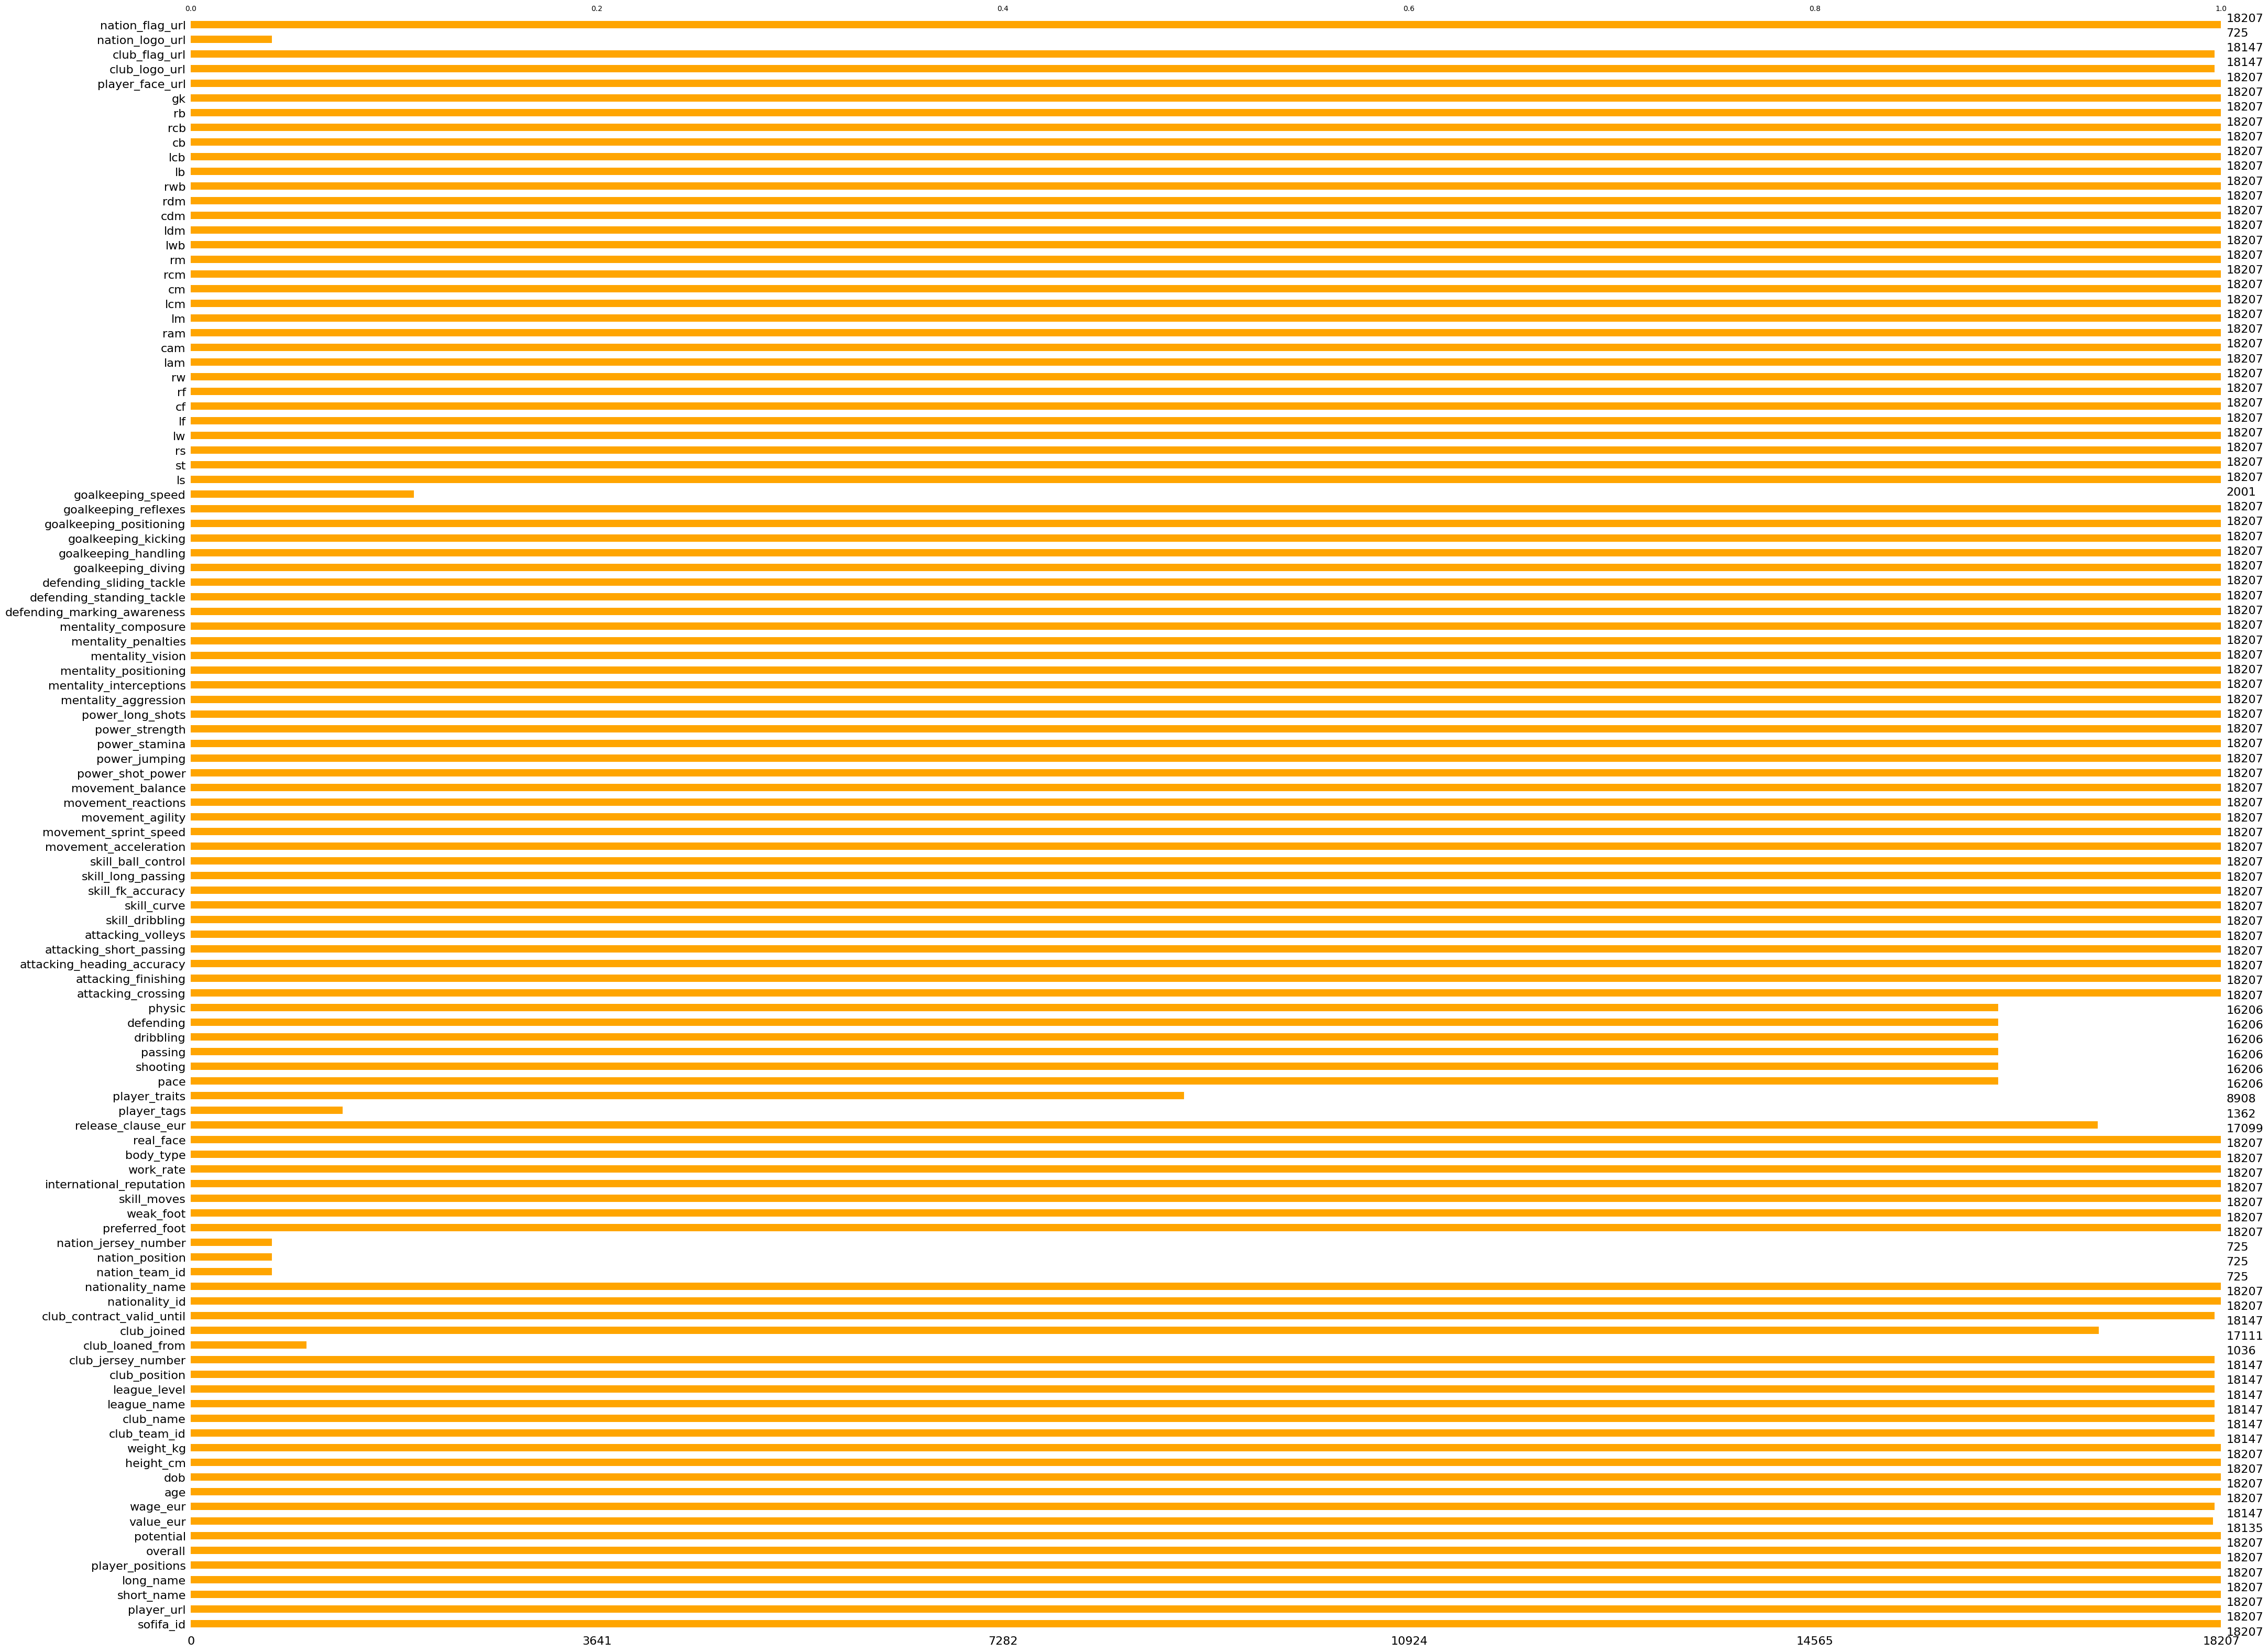

In [13]:
msno.bar(fifa_dataset_22.sample( 18207 ),(50,40),color='orange')

So from the above chart, we see that a few variables that have majority of null values aren't significant variables for our dataset, so we can safely remove them

In [14]:
fifa_dataset_22.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

61 is repeating many times. Let's check if the same rows are null throughout all these columns:

In [15]:
missing_1 = fifa_dataset_22[fifa_dataset_22['club_logo_url'].isnull()].index.tolist()
missing_2 = fifa_dataset_22[fifa_dataset_22['club_flag_url'].isnull()].index.tolist()
if missing_1 == missing_2:
    print('They are same')
else:
    print('They are different')

They are same


As they are same we can confidently assume that it will be same for other all columns too.

In [16]:
fifa_dataset_22.drop(fifa_dataset_22.index[missing_1],inplace =True)

In [17]:
#Removing the other columns that have major null values, and are not significant for our analysis.

fifa_dataset_22.drop(['nation_logo_url','goalkeeping_speed','player_traits','player_tags','nation_jersey_number','nation_position','nation_team_id','club_joined','club_loaned_from',],axis=1,inplace=True)

In [18]:
fifa_dataset_22[['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
       'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm',
       'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,89+3,89+3,89+3,92,93,93,93,92,93,93,...,66+3,64+3,64+3,64+3,66+3,61+3,50+3,50+3,50+3,61+3
1,90+2,90+2,90+2,85,88,88,88,85,86+3,86+3,...,64+3,66+3,66+3,66+3,64+3,61+3,60+3,60+3,60+3,61+3
2,90+1,90+1,90+1,88,89,89,89,88,86+3,86+3,...,63+3,59+3,59+3,59+3,63+3,60+3,53+3,53+3,53+3,60+3
3,83+3,83+3,83+3,90,88,88,88,90,89+2,89+2,...,67+3,63+3,63+3,63+3,67+3,62+3,50+3,50+3,50+3,62+3
4,83+3,83+3,83+3,88,87,87,87,88,89+2,89+2,...,79+3,80+3,80+3,80+3,79+3,75+3,69+3,69+3,69+3,75+3


In [19]:
#Let's convert the rating at each position to int

def ratingConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    
    else:
        return val

In [23]:
skill_columns = ['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
       'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm',
       'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']
                      
for col in skill_columns:
    fifa_dataset_22[col] = fifa_dataset_22[col].apply(ratingConverter)

In [25]:
fifa_dataset_22[['ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam',
       'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm',
       'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb']].head()

,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,92,92,92,94,96,96,96,94,96,96,...,69,67,67,67,69,64,53,53,53,64
1,92,92,92,90,96,96,96,90,89,89,...,67,69,69,69,67,64,63,63,63,64
2,91,91,91,96,98,98,98,96,89,89,...,66,62,62,62,66,63,56,56,56,63
3,86,86,86,90,96,96,96,90,91,91,...,70,66,66,66,70,65,53,53,53,65
4,86,86,86,96,94,94,94,96,91,91,...,82,83,83,83,82,78,72,72,72,78


In [26]:
def position_classifier(val):
    
    if val == 'RF' or val == 'ST' or val == 'LF' or val == 'RS' or val == 'LS' or val == 'CF':
        val = 'Forward'
        return val
        
    elif val == 'LW' or val == 'RCM' or val == 'LCM' or val == 'LDM' or val == 'CAM' or val == 'CDM' or val == 'RM' \
         or val == 'LAM' or val == 'LM' or val == 'RDM' or val == 'RW' or val == 'CM' or val == 'RAM':
        val = 'Midfielder'
        return val

    
    elif val == 'RCB' or val == 'CB' or val == 'LCB' or val == 'LB' or val == 'RB' or val == 'RWB' or val == 'LWB':
        val = 'Defender'
        return val
    
    else:
        return val

In [27]:
fifa_dataset_22['Position'] = fifa_dataset_22['club_position'].apply(position_classifier)
fifa_dataset_22['Position'].value_counts()

SUB           8299
RES           3168
Midfielder    3161
Defender      2850
Forward        999
GK             701
Name: Position, dtype: int64

Now we drop all the unnesessary variables

In [28]:
#Dropping unnecessary columns
fifa_dataset_22.drop(columns=['player_url','long_name','player_positions', 'dob', 'league_level','club_jersey_number', 'club_contract_valid_until', 'club_team_id', 'nationality_id', 
                    'real_face', 'player_face_url', 'club_logo_url', 'club_flag_url',
                    'nation_flag_url','ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam','ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm',
                   'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb'], inplace=True)

fifa_dataset_22.head().T

,0,1,2,3,4
sofifa_id,158023,188545,20801,190871,192985
short_name,L. Messi,R. Lewandowski,Cristiano Ronaldo,Neymar Jr,K. De Bruyne
overall,93,92,91,91,91
potential,93,92,91,91,91
value_eur,78000000.0,119500000.0,45000000.0,129000000.0,125500000.0
...,...,...,...,...,...
goalkeeping_kicking,15,12,15,15,5
goalkeeping_positioning,14,8,14,15,10
goalkeeping_reflexes,8,10,11,11,13
gk,19+3,19+3,20+3,20+3,21+3


In [29]:
fifa_dataset_22.columns

Index(['sofifa_id', 'short_name', 'overall', 'potential', 'value_eur',
       'wage_eur', 'age', 'height_cm', 'weight_kg', 'club_name', 'league_name',
       'club_position', 'nationality_name', 'preferred_foot', 'weak_foot',
       'skill_moves', 'international_reputation', 'work_rate', 'body_type',
       'release_clause_eur', 'pace', 'shooting', 'passing', 'dribbling',
       'defending', 'physic', 'attacking_crossing', 'attacking_finishing',
       'attacking_heading_accuracy', 'attacking_short_passing',
       'attacking_volleys', 'skill_dribbling', 'skill_curve',
       'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
       'movement_acceleration', 'movement_sprint_speed', 'movement_agility',
       'movement_reactions', 'movement_balance', 'power_shot_power',
       'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots',
       'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalt

In [30]:
fifa22_tableau = fifa_dataset_22.copy()

fifa22_tableau.head()

,sofifa_id,short_name,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_name,...,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,gk,Position
0,158023,L. Messi,93,93,78000000.0,320000.0,34,170,72,Paris Saint-Germain,...,20,35,24,6,11,15,14,8,19+3,Midfielder
1,188545,R. Lewandowski,92,92,119500000.0,270000.0,32,185,81,FC Bayern München,...,35,42,19,15,6,12,8,10,19+3,Forward
2,20801,Cristiano Ronaldo,91,91,45000000.0,270000.0,36,187,83,Manchester United,...,24,32,24,7,11,15,14,11,20+3,Forward
3,190871,Neymar Jr,91,91,129000000.0,270000.0,29,175,68,Paris Saint-Germain,...,35,32,29,9,9,15,15,11,20+3,Midfielder
4,192985,K. De Bruyne,91,91,125500000.0,350000.0,30,181,70,Manchester City,...,68,65,53,15,13,5,10,13,21+3,Midfielder


In [31]:
#Dropping gk
fifa_dataset_22.drop(columns=['gk'], inplace=True)

fifa_dataset_22.head().T

,0,1,2,3,4
sofifa_id,158023,188545,20801,190871,192985
short_name,L. Messi,R. Lewandowski,Cristiano Ronaldo,Neymar Jr,K. De Bruyne
overall,93,92,91,91,91
potential,93,92,91,91,91
value_eur,78000000.0,119500000.0,45000000.0,129000000.0,125500000.0
...,...,...,...,...,...
goalkeeping_handling,11,6,11,9,13
goalkeeping_kicking,15,12,15,15,5
goalkeeping_positioning,14,8,14,15,10
goalkeeping_reflexes,8,10,11,11,13


In [38]:
from google.colab import drive
# drive.mount('/content/drive')

fifa22_tableau.to_csv("/content/drive/MyDrive/Colab Notebooks")
# !cp fifa22tableau.csv "drive/My Drive/"

IsADirectoryError: ignored